In [36]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count',
'srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
'dst_host_rerror_rate','dst_host_srv_rerror_rate','intrusion_type']
len(features)

42

In [38]:
ds = pd.read_csv("kddcup.data_10_percent_corrected", names=features)
ds.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
216285,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
96627,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
412596,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
489660,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
141846,0,udp,ntp_u,SF,48,48,0,0,0,0,...,18,0.07,0.01,0.07,0.0,0.0,0.0,0.0,0.0,normal.


In [39]:
print("Data size:", ds.shape)
print(f"{ds.shape[0]} entries and {ds.shape[1]} features")
print(f"{len(ds['intrusion_type'].unique())} classifications based on intrusion_type")
print("\nThe different types of output labels are: ")
print(ds.intrusion_type.unique())

Data size: (494021, 42)
494021 entries and 42 features
23 classifications based on intrusion_type

The different types of output labels are: 
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


In [40]:
ds.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [41]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [42]:
ds_dup = ds[ds.duplicated()]
print(ds_dup.shape)
ds_dup.head()

(348435, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
2500,0,tcp,http,SF,307,60990,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2864,0,tcp,http,SF,351,11485,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2977,0,tcp,http,SF,506,2419,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
3003,0,tcp,http,SF,319,1374,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
3130,0,tcp,http,SF,234,1212,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.


In [43]:
ds.drop_duplicates(subset=features, keep='first', inplace=True)
ds.shape

(145586, 42)

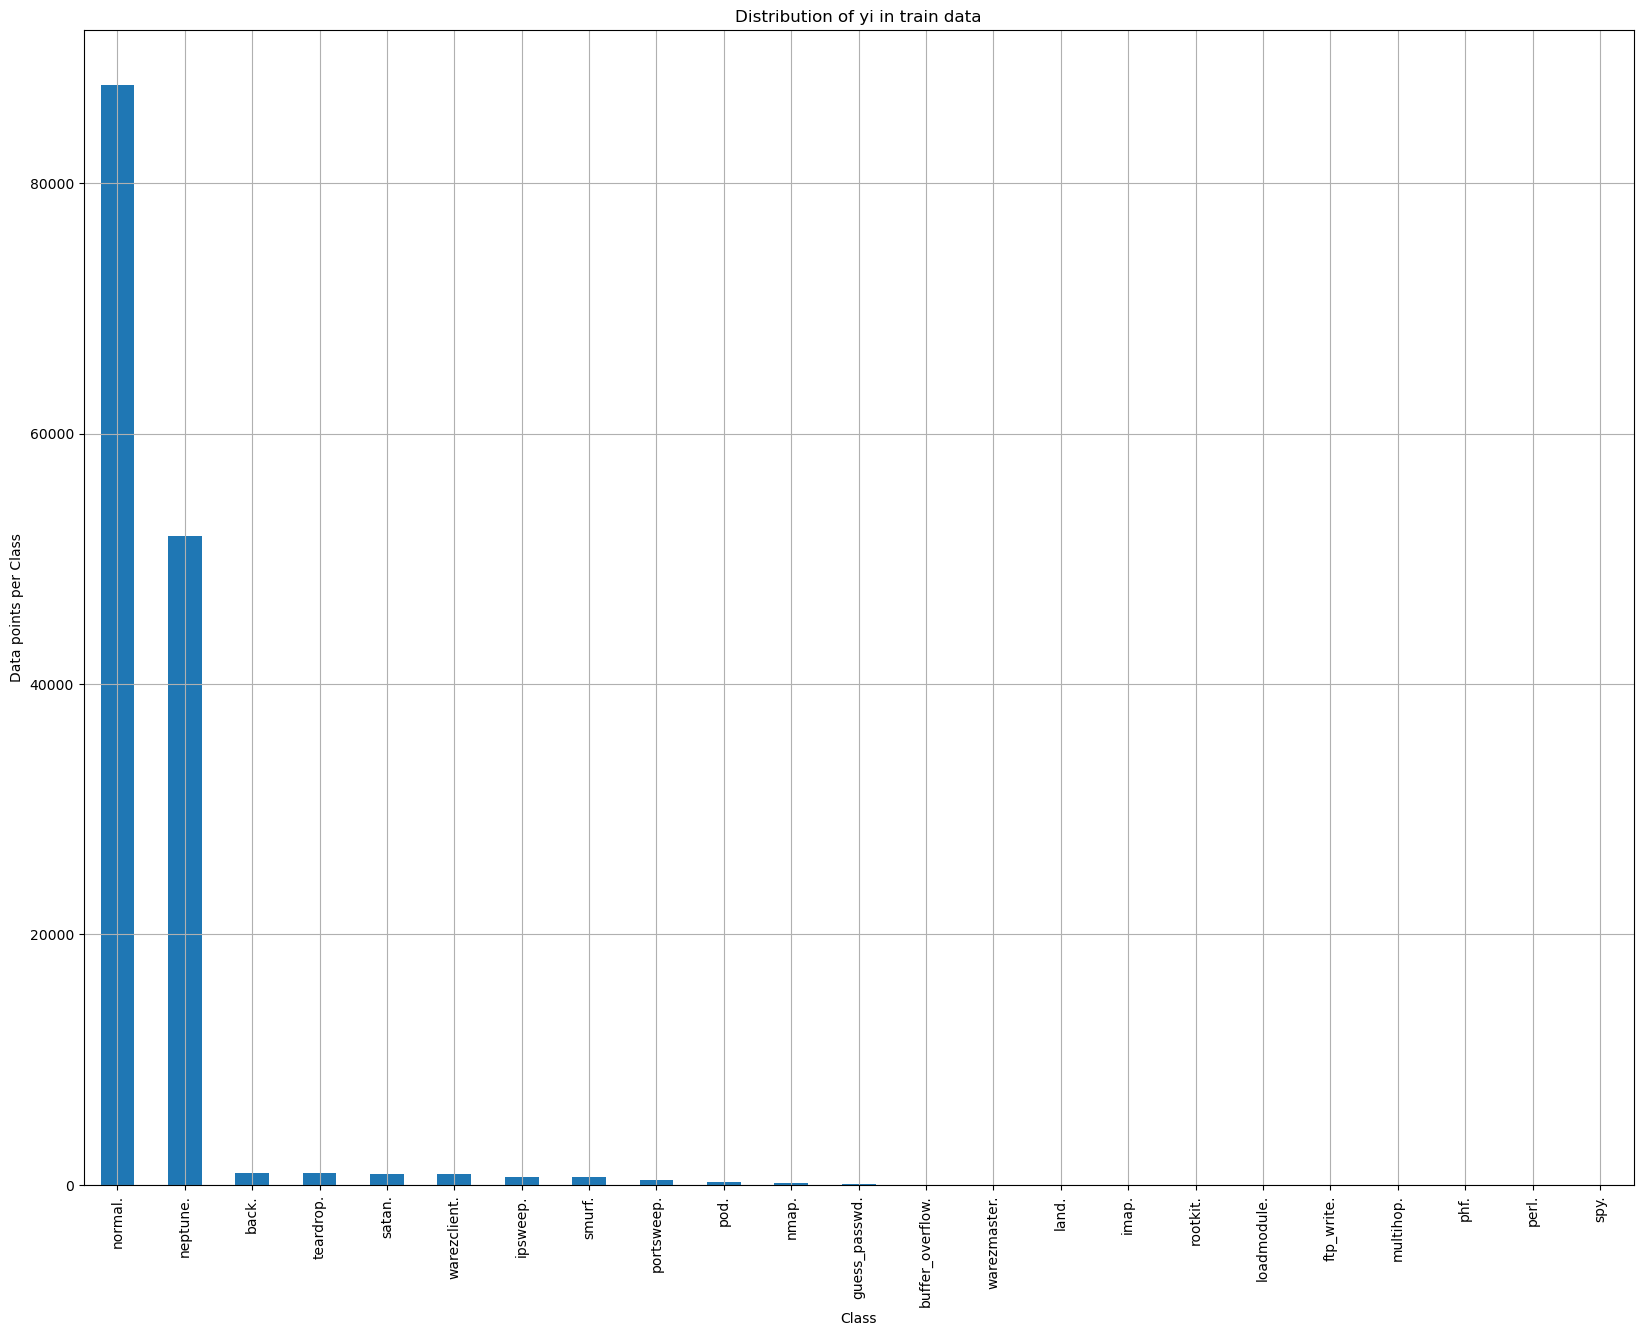

Number of data points in class [1] : 87832 ( 60.33 %)
Number of data points in class [2] : 51820 ( 35.594 %)
Number of data points in class [3] : 968 ( 0.665 %)
Number of data points in class [4] : 918 ( 0.631 %)
Number of data points in class [5] : 906 ( 0.622 %)
Number of data points in class [6] : 893 ( 0.613 %)
Number of data points in class [7] : 651 ( 0.447 %)
Number of data points in class [8] : 641 ( 0.44 %)
Number of data points in class [9] : 416 ( 0.286 %)
Number of data points in class [10] : 206 ( 0.141 %)
Number of data points in class [11] : 158 ( 0.109 %)
Number of data points in class [12] : 53 ( 0.036 %)
Number of data points in class [13] : 30 ( 0.021 %)
Number of data points in class [14] : 20 ( 0.014 %)
Number of data points in class [15] : 19 ( 0.013 %)
Number of data points in class [16] : 12 ( 0.008 %)
Number of data points in class [17] : 10 ( 0.007 %)
Number of data points in class [18] : 9 ( 0.006 %)
Number of data points in class [19] : 8 ( 0.005 %)
Number o

In [44]:
plt.figure(figsize=(20,15))
class_distribution = ds['intrusion_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', [i+1], ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/ds.shape[0]*100), 3), '%)')

    

In [45]:
intrusion_binary = []
for i in ds['intrusion_type'].values:
    if i=='normal.':
        intrusion_binary.append(1)
    else:
        intrusion_binary.append(0)
print(len(intrusion_binary))
print(intrusion_binary[:10])

145586
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [46]:
ds['intrusion_binary'] = intrusion_binary
ds.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type,intrusion_binary
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [47]:
ds.drop('intrusion_type', axis=1, inplace=True)
print(f'Shape of the data is: {ds.shape}')
print('Features of the dataset:')
print(ds.columns)

Shape of the data is: (145586, 42)
Features of the dataset:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion_binary'],
      dtype='object')


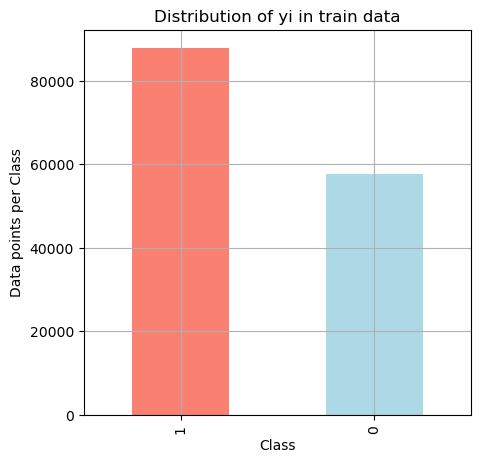

Number of data points in class [1] : 87832 ( 60.33 %)
Number of data points in class [2] : 57754 ( 39.67 %)


In [48]:
plt.figure(figsize=(5,5))
class_distribution = ds['intrusion_binary'].value_counts()
class_distribution.plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', [i+1], ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/ds.shape[0]*100), 3), '%)')

    

In [49]:
def pairplot(data, label, features=[]):
    '''
    This function creates pairplot taking 4 features from our dataset as default parameters along with the output variable
    '''
    sns.pairplot(data, hue=label, height=4, diag_kind='hist', vars=features,
            plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

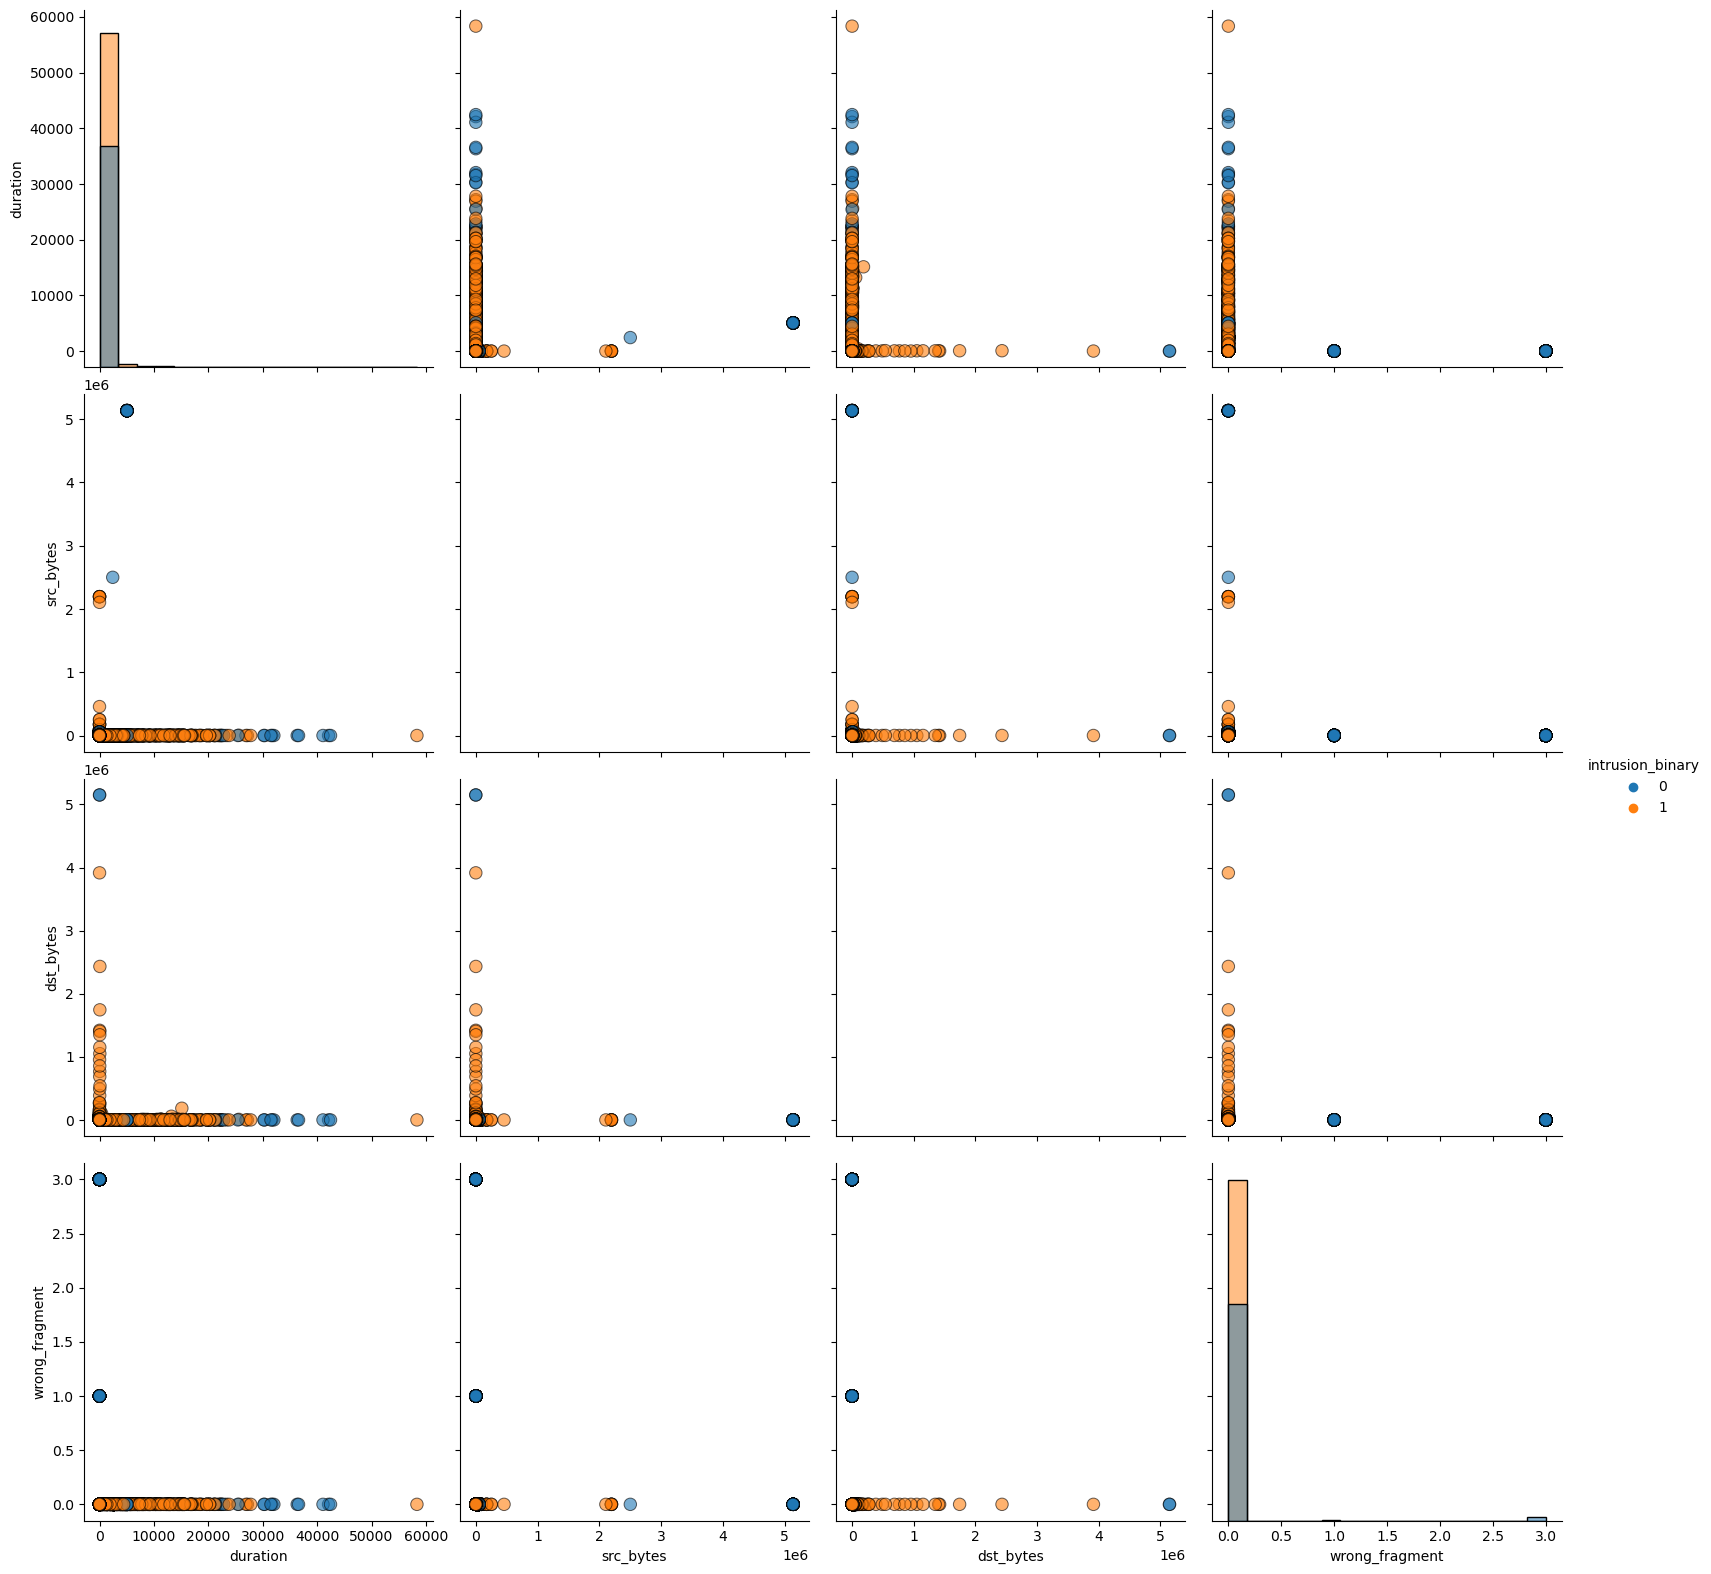

In [33]:
pairplot(ds.sample(frac=0.30), 'intrusion_binary', features=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'])

In [16]:
#pairplot(ds, 'intrusion_binary',features=['urgent','hot','num_failed_logins','num_compromised'])

In [17]:
#pairplot(ds, 'intrusion_binary', features=['root_shell','su_attempted','num_root','num_file_creations'])

In [18]:
#pairplot(ds, 'intrusion_binary', features=['num_shells','num_access_files','num_outbound_cmds','count'])

In [19]:
#pairplot(ds, 'intrusion_binary', features=['srv_count','serror_rate','srv_serror_rate','rerror_rate'])

In [20]:
#pairplot(ds, 'intrusion_binary', features=['srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate'])

In [21]:
#pairplot(ds, 'intrusion_binary', features=['dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate'])

In [22]:
#pairplot(ds, 'intrusion_binary', features=['dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'])

In [50]:
from datetime import datetime
from sklearn.manifold import TSNE
import joblib

def tsne_func(data, label, no_components, perplexity_value, n_iter_value):
    '''
    This function applies TSNE on the original dataset with no_components, perplexity_value, n_iter_value as the TSNE 
    parameters and transforms the original dataset into TSNE transformed feature space with the tsne dataset containing 
    number of features equal to the value specified for no_components and also plots the scatter plot of the transformed 
    data points along with their class label 
    '''
    start = datetime.now()
    print('TSNE with perplexity={} and no. of iterations={}'.format(perplexity_value, n_iter_value))
    tsne = TSNE(n_components=no_components, perplexity=perplexity_value, n_iter=n_iter_value)
    tsne_df1 = tsne.fit_transform(data)
    print(tsne_df1.shape)
    tsne_df1 = np.vstack((tsne_df1.T, Y)).T
    tsne_data1 = pd.DataFrame(data=tsne_df1, columns=['feature1', 'feature2', 'Output'])
    sns.FacetGrid(tsne_data1, hue='Output', size=6).map(plt.scatter, 'feature1', 'feature2').add_legend()
    print('Total time taken:',datetime.now()-start)
    plt.show()

TSNE with perplexity=100 and no. of iterations=500


C:\Users\bhadr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\bhadr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(145586, 2)


C:\Users\bhadr\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Total time taken: 0:11:13.445944


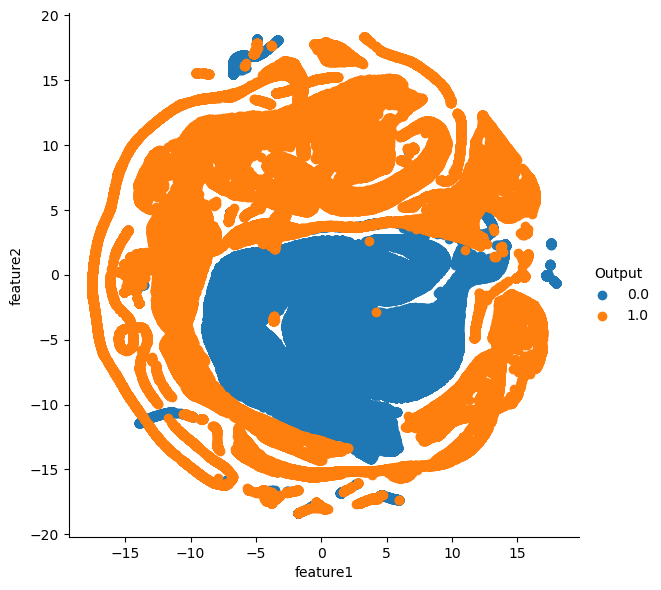

In [51]:
df = ds.drop(['intrusion_binary','service','flag','protocol_type'], axis=1)
Y = ds['intrusion_binary'].values

tsne_func(data=df, label=Y, no_components=2, perplexity_value=100, n_iter_value=500)

TSNE with perplexity=50 and no. of iterations=1000


C:\Users\bhadr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\bhadr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(145586, 2)


C:\Users\bhadr\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Total time taken: 0:15:49.958368


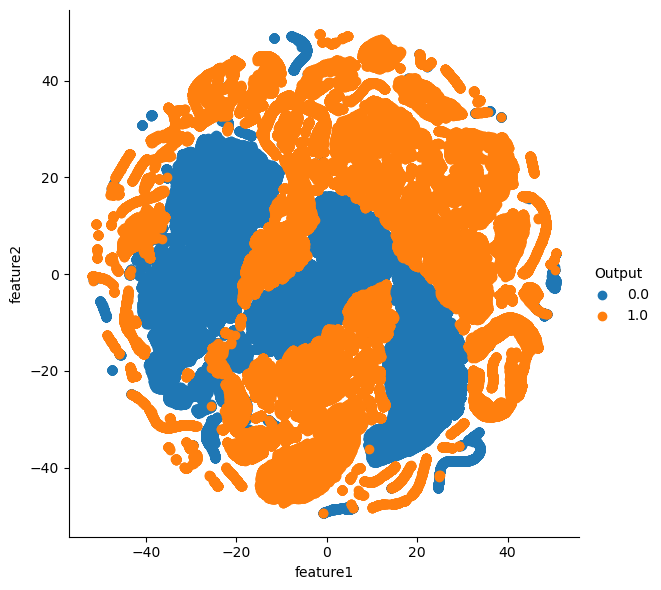

In [52]:
tsne_func(data=df, label=Y, no_components=2, perplexity_value=50, n_iter_value=1000)

C:\Users\bhadr\AppData\Local\Temp\ipykernel_11896\1413762376.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ds = ds.dropna('columns')# drop columns with NaN


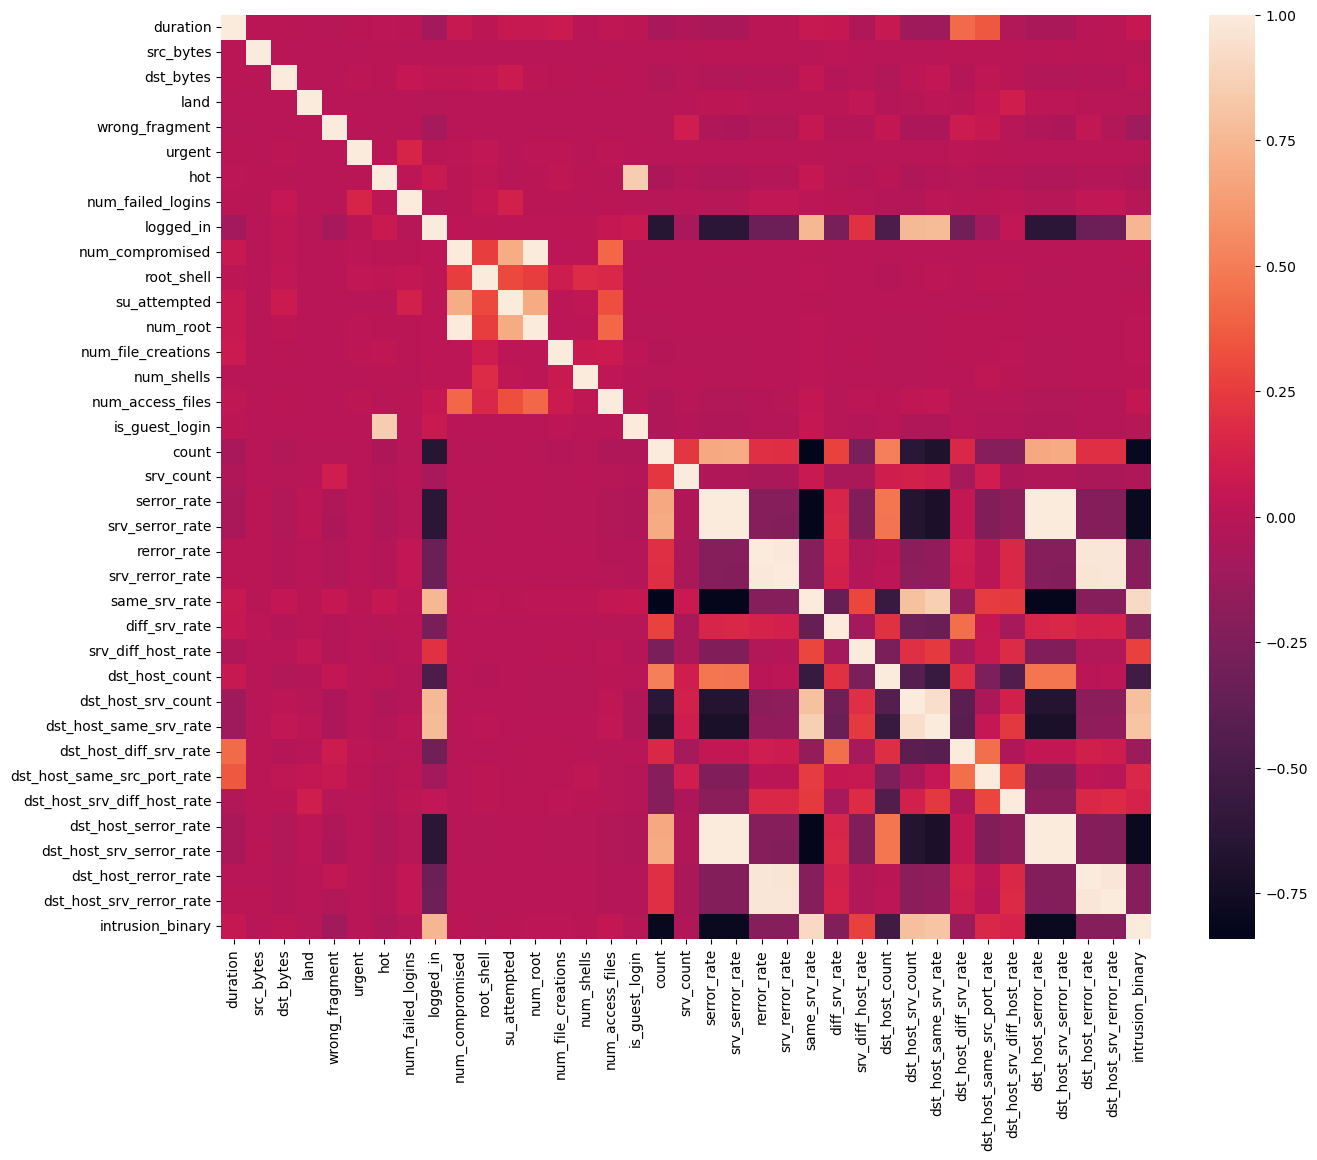

In [27]:
ds = ds.dropna('columns')# drop columns with NaN
ds = ds[[col for col in ds if ds[col].nunique() > 1]]# keep columns where there are more than 1 unique values
corr = ds.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [54]:
ds.shape

(145586, 42)

In [55]:
ds['num_root'].corr(ds['num_compromised'])

0.9942146069064681

In [56]:
ds['srv_serror_rate'].corr(ds['serror_rate'])

0.9963627548286997

In [57]:
ds['srv_count'].corr(ds['count'])

0.2293236603765414

In [58]:
ds['srv_rerror_rate'].corr(ds['rerror_rate'])

0.991316952571299

In [59]:
ds['dst_host_same_srv_rate'].corr(ds['dst_host_srv_count'])

0.9365191648908988

In [60]:
ds['dst_host_srv_serror_rate'].corr(ds['dst_host_serror_rate'])

0.9958977350060596

In [61]:
ds['dst_host_srv_rerror_rate'].corr(ds['dst_host_rerror_rate'])

0.9715011333749523

In [62]:
ds['dst_host_same_srv_rate'].corr(ds['same_srv_rate'])

0.8583961573374818

In [63]:
ds['dst_host_srv_count'].corr(ds['same_srv_rate'])

0.7972149497260566

In [64]:
ds['dst_host_same_src_port_rate'].corr(ds['srv_count'])

0.09507134180392145

In [65]:
ds['dst_host_serror_rate'].corr(ds['serror_rate'])

0.9968427313716647

In [66]:
ds['dst_host_serror_rate'].corr(ds['srv_serror_rate'])

0.9951224321913412

In [67]:
ds['dst_host_srv_serror_rate'].corr(ds['serror_rate'])

0.9951521034735545

In [68]:
ds['dst_host_srv_serror_rate'].corr(ds['srv_serror_rate'])

0.9983509795965033

In [69]:
ds['dst_host_rerror_rate'].corr(ds['rerror_rate'])

0.9755139232818131

In [70]:
ds['dst_host_rerror_rate'].corr(ds['srv_rerror_rate'])

0.9673749564724704

In [71]:
ds['dst_host_srv_rerror_rate'].corr(ds['rerror_rate'])

0.9726142096063977

In [72]:
ds['dst_host_srv_rerror_rate'].corr(ds['srv_rerror_rate'])

0.9751047687986119

In [73]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
ds.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
ds.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
ds.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
ds.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
ds.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
ds.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#Correlation = 0.9851995540751249)
ds.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
ds.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [74]:
ds.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,intrusion_binary
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,1


In [75]:
ds.shape

(145586, 34)

In [76]:
ds.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'intrusion_binary'],
      dtype='object')

In [77]:
df_std = ds.std()
df_std = df_std.sort_values(ascending = True)
df_std

C:\Users\bhadr\AppData\Local\Temp\ipykernel_16004\923811631.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_std = ds.std()


num_outbound_cmds              0.000000e+00
is_host_login                  0.000000e+00
urgent                         1.015038e-02
land                           1.171998e-02
su_attempted                   1.435444e-02
root_shell                     1.943305e-02
num_shells                     2.029761e-02
num_failed_logins              2.858542e-02
dst_host_srv_diff_host_rate    6.040967e-02
num_access_files               6.709079e-02
is_guest_login                 6.843257e-02
diff_srv_rate                  1.203955e-01
dst_host_diff_srv_rate         1.470208e-01
num_file_creations             1.775812e-01
wrong_fragment                 2.393680e-01
dst_host_same_src_port_rate    2.411234e-01
srv_diff_host_rate             2.419522e-01
rerror_rate                    3.089614e-01
same_srv_rate                  4.467948e-01
serror_rate                    4.529027e-01
intrusion_binary               4.892145e-01
logged_in                      4.999293e-01
hot                            1

In [78]:
ds['protocol_type'].value_counts()

tcp     130913
udp      12267
icmp      2406
Name: protocol_type, dtype: int64

In [79]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
ds['protocol_type'] = ds['protocol_type'].map(pmap)

In [80]:
ds['flag'].value_counts()

SF        87459
S0        42278
REJ       14712
RSTO        569
RSTR        425
S1           57
SH           34
S2           24
RSTOS0       11
S3           10
OTH           7
Name: flag, dtype: int64

In [81]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
ds['flag'] = ds['flag'].map(fmap)
ds.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,intrusion_binary
0,0,1,http,0,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,1
1,0,1,http,0,239,486,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,1
2,0,1,http,0,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,1
3,0,1,http,0,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,1
4,0,1,http,0,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,1


In [82]:
ds.drop('service',axis = 1,inplace= True)

In [83]:
ds.shape

(145586, 33)

In [84]:
ds.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,intrusion_binary
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,1
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,1
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,1
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,1
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,1


In [85]:
ds.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate            

TSNE with perplexity=50 and no. of iterations=1000


C:\Users\bhadr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\bhadr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(145586, 2)


C:\Users\bhadr\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Total time taken: 0:13:28.460778


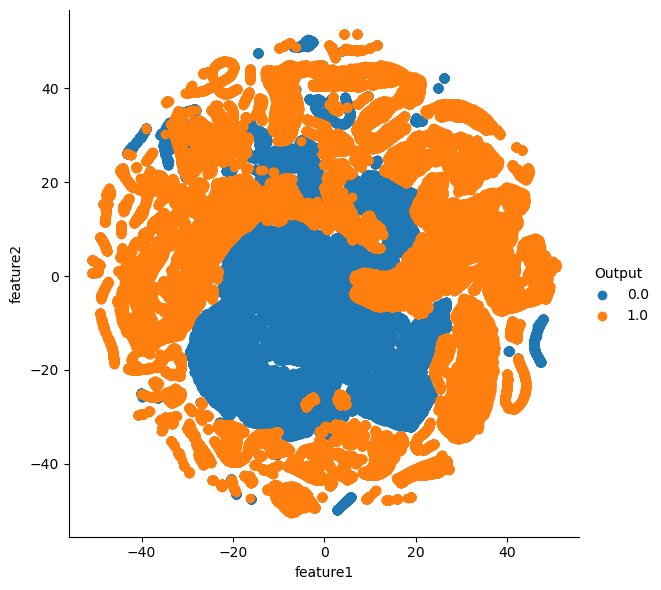

In [89]:
Y = ds['intrusion_binary'].values
tsne_func(data=ds, label=Y, no_components=2, perplexity_value=50, n_iter_value=1000)

In [61]:
ds.to_csv('KDDCup_10percent_preprocessed.csv', index=False)

In [35]:
df = ds
df.sample(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,intrusion_binary
357340,0,1,1,0,0,0,0,0,0,0,...,0.0,0.02,0.06,0.0,255,16,0.07,0.00,0.00,0
482518,5415,2,0,147,105,0,0,0,0,0,...,0.0,1.00,0.00,0.0,255,1,0.85,1.00,0.00,1
467709,0,1,2,0,0,0,0,0,0,0,...,1.0,0.08,0.07,0.0,255,8,0.08,0.00,0.00,0
105035,0,1,0,248,4087,0,0,0,0,0,...,0.0,1.00,0.00,0.0,230,255,0.00,0.00,0.01,1
18311,0,1,0,348,5599,0,0,0,0,0,...,0.0,1.00,0.00,0.0,40,255,0.00,0.03,0.04,1


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [32]:
Y = df[['intrusion_binary']]
X = df.drop(['intrusion_binary'], axis=1)
X

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,1,0,181,5450,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00
1,0,1,0,239,486,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00
2,0,1,0,235,1337,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00
3,0,1,0,219,1337,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00
4,0,1,0,217,2032,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,310,1881,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05
494017,0,1,0,282,2286,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05
494018,0,1,0,203,1200,0,0,0,0,0,...,0.17,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05
494019,0,1,0,291,1200,0,0,0,0,0,...,0.00,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05


In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(97542, 30) (48044, 30)
(97542, 1) (48044, 1)


In [68]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print("Train score is:", model.score(X_train, Y_train))
print("Test score is:",model.score(X_test,Y_test))

Train score is: 0.9850320887412601
Test score is: 0.9851178086753809


In [127]:
d = pd.read_csv('performance_records.csv')
a = d.loc[d['Accuracy'] == d.Accuracy.max()]
print(a["Accuracy"].values)

[0.99904894]


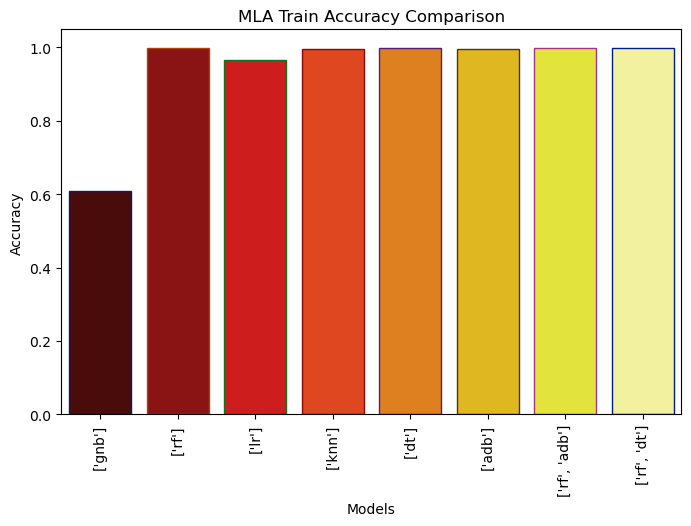

In [134]:
plt.subplots(figsize=(8,5))
sns.barplot(x="Models", y="Accuracy",data=d,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

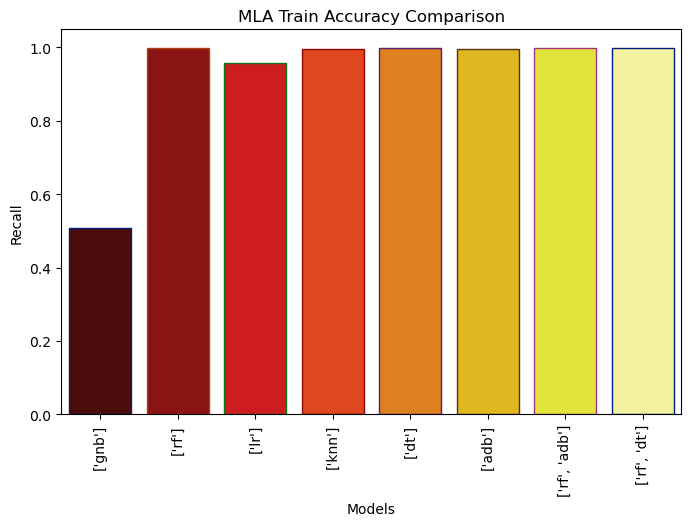

In [139]:
plt.subplots(figsize=(8,5))
sns.barplot(x="Models", y="Recall",data=d,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

In [141]:
d = pd.read_csv('performance_records.csv')
d.head(19)

,Models,Accuracy,Precision,Recall,F1 Score,Duration,TP,FP,FN,TN
0,rf,0.999048,0.999127,0.998885,0.999006,00:00.6,40351,77,20,61463
1,dt,0.998322,0.998224,0.998271,0.998247,00:00.0,40348,80,91,61392
2,gnb,0.608963,0.741539,0.507539,0.393790,00:00.1,672,39756,95,61388
3,rf dt,0.998214,0.998118,0.998151,0.998135,00:00.7,40341,87,95,61388
4,lr adb,0.970062,0.975007,0.963198,0.968356,00:00.8,37597,2831,220,61263
5,lr knn adb,0.995820,0.996180,0.995091,0.995629,00:04.4,40087,341,85,61398
6,rf adb dt,0.998469,0.998397,0.998405,0.998401,0:00:01.430173,40351,77,79,61404
7,lr knn rf adb gnb dt,0.997527,0.997915,0.996926,0.997414,0:00:04.872131,40186,242,10,61473
8,lr knn dt,0.997733,0.998028,0.997240,0.997630,0:00:03.545677,40220,208,23,61460
9,gnb dt,0.997724,0.997451,0.997796,0.997623,0:00:00.085617,40353,75,157,61326
